In [693]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import imghdr
import cv2
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [703]:
data_dir = 'data'
image_exts = ['png', 'jpg', 'jpeg']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [704]:
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=32
)
class_names = data.class_names
print("Classes:", class_names)

Found 536 files belonging to 6 classes.
Classes: ['doge', 'giga', 'gru', 'pikachu', 'sigma', 'troll']


In [705]:
data = data.map(lambda x, y: (x / 255.0, y))
data_batches = data.cardinality().numpy()
train_size = int(0.7 * data_batches)
val_size = int(0.2 * data_batches)+1
test_size = int(0.1 * data_batches)+1

In [706]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [707]:
# LeNet5
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(6, 5, activation='relu'),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, 5, activation='relu'),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [708]:
# # AlexNet
# model = models.Sequential([
#     layers.Input(shape=(224, 224, 3)),
#     layers.Conv2D(96, 11, strides=4, activation='relu'),
#     layers.MaxPooling2D(pool_size=(3, 3), strides=2),
#     layers.Conv2D(256, 5, padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(3, 3), strides=2),
#     layers.Conv2D(384, 3, padding='same', activation='relu'),
#     layers.Conv2D(384, 3, padding='same', activation='relu'),
#     layers.Conv2D(256, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(3, 3), strides=2),
#     layers.Flatten(),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(6, activation='softmax')
# ])


In [709]:
# # VGG16
# base = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# base.trainable = False
# model = models.Sequential([
#     base,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(6, activation='softmax')
# ])

In [710]:
# # ResNet50
# base = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# base.trainable = False
# model = models.Sequential([
#     base,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(6, activation='softmax')
# ])

In [711]:
# # InceptionV3
# base = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# base.trainable = False
# model = models.Sequential([
#     base,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(6, activation='softmax')
# ])

In [712]:
# # MobileNetV2
# base = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# base.trainable = False
# model = models.Sequential([
#     base,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(6, activation='softmax')
# ])

In [723]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_124 (Conv2D)                  │ (None, 220, 220, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_17                 │ (None, 110, 110, 6)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_125 (Conv2D)                  │ (None, 106, 106, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_18                 │ (None, 53, 53, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 44944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 120)                 │       5,393,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 6)                   │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,406,946 (20.63 MB)

 Trainable params: 5,406,946 (20.63 MB)

 Non-trainable params: 0 (0.00 B)

In [725]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [667]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 871ms/step - accuracy: 0.3275 - loss: 1.8330 - val_accuracy: 0.5547 - val_loss: 1.0735
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 590ms/step - accuracy: 0.6490 - loss: 0.8938 - val_accuracy: 0.8125 - val_loss: 0.6080
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 627ms/step - accuracy: 0.8539 - loss: 0.4904 - val_accuracy: 0.9141 - val_loss: 0.3944
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 594ms/step - accuracy: 0.9076 - loss: 0.3647 - val_accuracy: 0.8984 - val_loss: 0.3595
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 589ms/step - accuracy: 0.9195 - loss: 0.2941 - val_accuracy: 0.9141 - val_loss: 0.3005
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 621ms/step - accuracy: 0.9286 - loss: 0.2658 - val_accuracy: 0.9375 - val_loss: 0.2510
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 625ms/step - accuracy: 0.9463 - loss: 0.2373 - val_accuracy: 0.9688 - val_loss: 0.1606
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 674ms/step - accuracy: 0.9838 - loss: 0.1806 - val_accuracy: 0

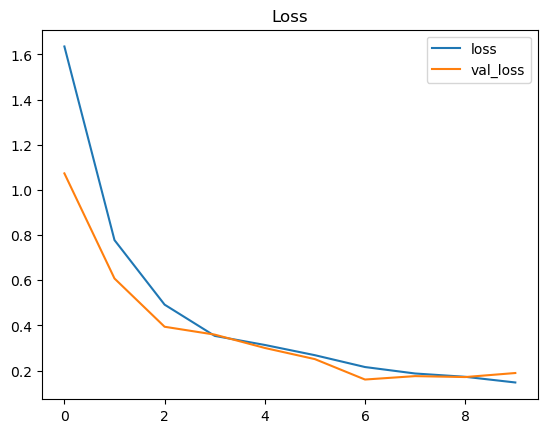

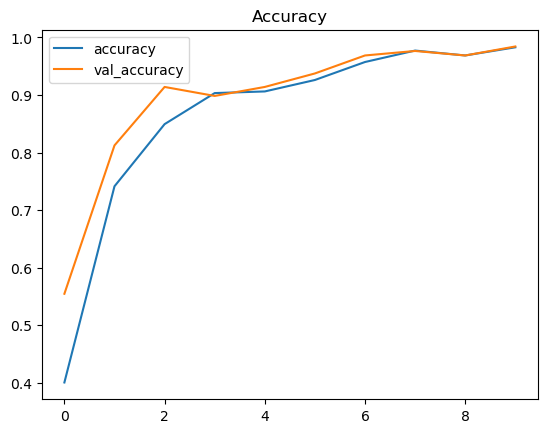

In [668]:
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.figure()
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [669]:
y_true, y_pred = [], []
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    y_true.extend(y)
    y_pred.extend(np.argmax(yhat, axis=1))
y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [670]:
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)

accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}")

model.save("lenet_model.keras")

Precision: 0.9866, Recall: 0.9821, Accuracy: 0.9821
